In [22]:
%matplotlib inline
from astropy.table import Table, join
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [23]:
original = fits.open('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/NnpzGalaxyPP/develop.fits')

In [24]:
refactor = fits.open('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/NnpzGalaxyPP/refactor.fits')

# Verify additional HDUs

In [26]:
set([o.name for o in original]).difference([r.name for r in refactor])

set()

In [37]:
for o in original[2:]:
    print(o.name)
    r = refactor[o.name]
    assert not (set(o.data.dtype.names).difference(r.data.dtype.names))
    for col in o.data.dtype.names:
        print('\t', col)
        assert np.array_equal(o.data[col], r.data[col])

BINS_MC_PDF_1D_Z
	 BINS_PDF
BINS_MC_PDF_1D_LOG_STELLARMASS
	 BINS_PDF
BINS_MC_PDF_1D_SFR
	 BINS_PDF
BINS_MC_PDF_2D_Z_LOG_STELLARMASS
	 Z
	 LOG_STELLARMASS
BINS_MC_COUNT_GAL_TYPE
	 BINS
BINS_MC_COUNT_SFH_TYPE
	 BINS
BINS_MC_SLICE_AGGREGATE_SFH_TAU_SFH_TYPE_AVG
	 SFH_TYPE


# Verify main HDU

In [40]:
odata = original[1].data
rdata = refactor[1].data
print(set(odata.dtype.names).difference(rdata.dtype.names))

{'FLAGS_1'}


In [41]:
assert np.array_equal(odata['OBJECT_ID'], rdata['OBJECT_ID'])

In [51]:
ozbins = original['BINS_MC_PDF_1D_Z'].data
rzbins = refactor['BINS_MC_PDF_1D_Z'].data

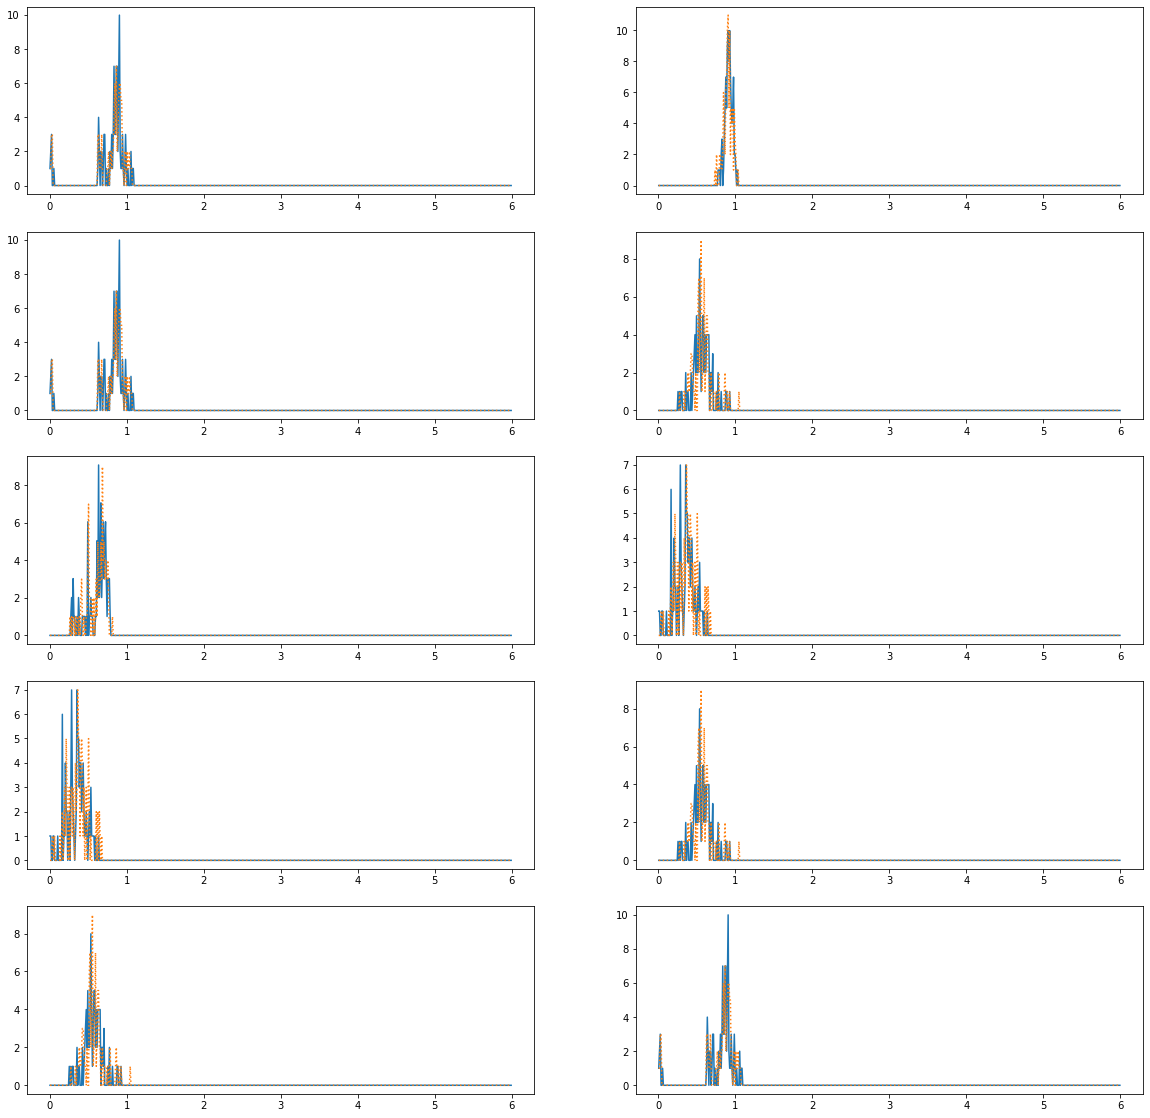

In [53]:
idx = np.random.choice(len(refactor), 10)

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20,20))

for i, ax in zip(idx, axes.ravel()):
    assert odata['OBJECT_ID'][i] == rdata['OBJECT_ID'][i]
    ax.plot(ozbins, odata['MC_PDF_1D_Z'][i], linestyle='-')
    ax.plot(rzbins, rdata['MC_PDF_1D_Z'][i], linestyle=':')

In [54]:
ostellarbins = original['BINS_MC_PDF_1D_LOG_STELLARMASS'].data
rstellarbins = refactor['BINS_MC_PDF_1D_LOG_STELLARMASS'].data

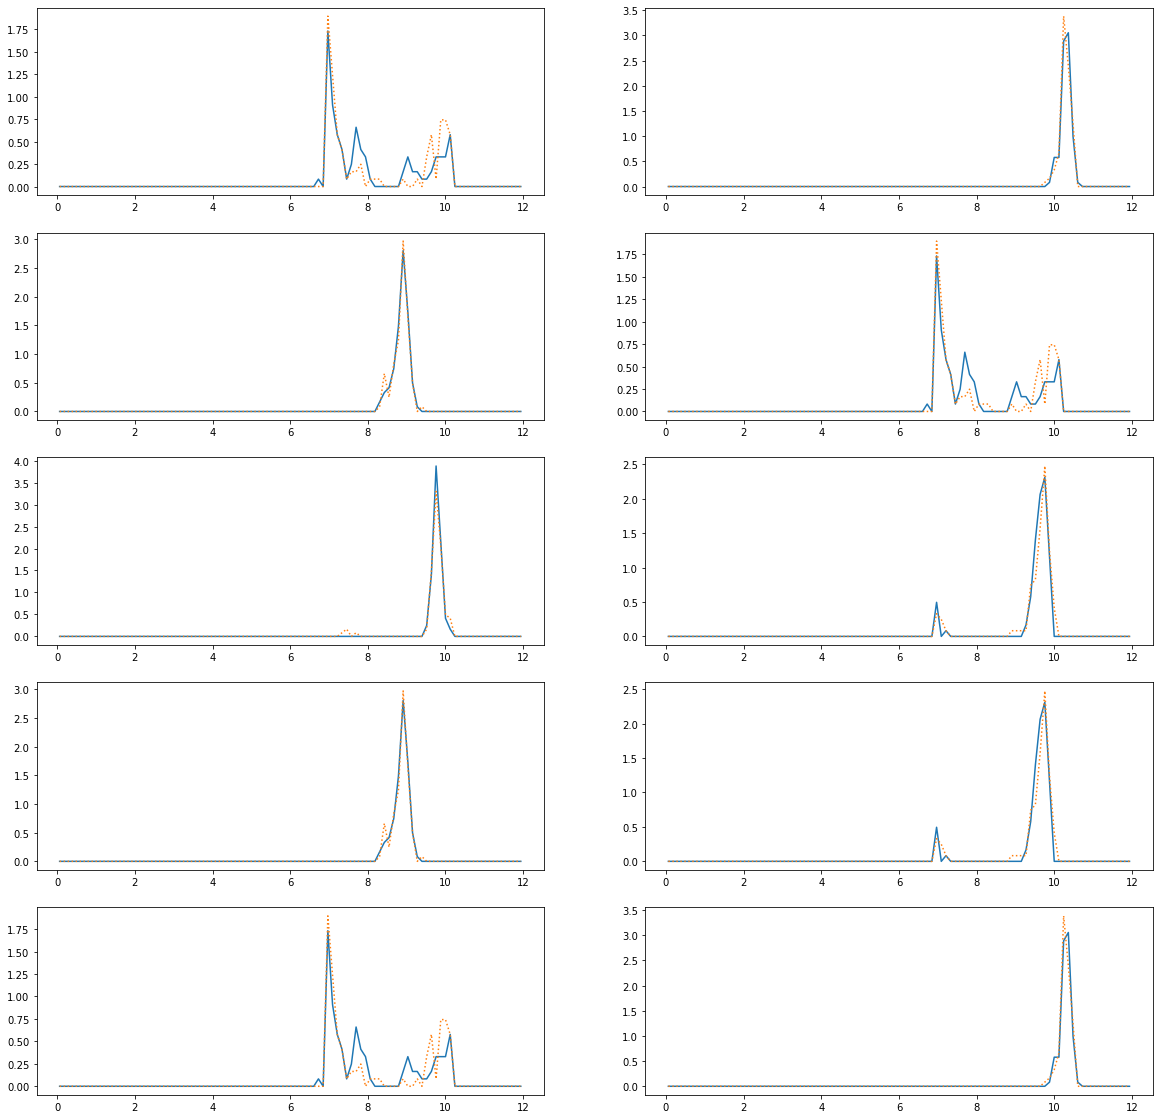

In [55]:
idx = np.random.choice(len(refactor), 10)

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20,20))

for i, ax in zip(idx, axes.ravel()):
    assert odata['OBJECT_ID'][i] == rdata['OBJECT_ID'][i]
    ax.plot(ostellarbins, odata['MC_PDF_1D_LOG_STELLARMASS'][i], linestyle='-')
    ax.plot(rstellarbins, rdata['MC_PDF_1D_LOG_STELLARMASS'][i], linestyle=':')